In [1]:
from src.standartization import Standartization
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, Dropout, Flatten, MaxPooling2D, Activation,Dense
from tensorflow.keras import Sequential
import tensorflow as tf

# Fazendo o dataset de treino  e teste

In [2]:
standart = Standartization('Dataset')

In [51]:
dataset = standart.__getAllImages__()
#dataset = standart.__getAllImagesRemovedBackground__()
#dataset = standart.__getAllImagesCor_gamma__()
#dataset = standart.__getAllImagesDetecBorda__()

In [52]:
imagens = dataset['images']
labels = dataset['labels']

In [53]:
#labels = keras.utils.to_categorical(labels,num_classes=4)

In [54]:
#labels.shape

In [55]:
X_train, X_test, y_train, y_test = train_test_split(imagens,labels,test_size=0.2)

In [56]:
X_train.shape

(336, 224, 224, 3)

In [57]:
X_test.shape

(85, 224, 224, 3)

In [58]:
y_train.shape

(336,)

# Construção do modelo

In [59]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,confusion_matrix

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [61]:
epochs = 10
batch_size = 32

## Modelo Squad

In [62]:
#model_file = os.path.join(output_path,model_name)
model = Sequential()
model.add(Conv2D(512, kernel_size=(3, 3), input_shape=X_train.shape[1:],padding='same'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.1))
model.add(Conv2D(256, kernel_size=(3,3),padding='same'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.1))
model.add(Conv2D(128, kernel_size=(3, 3),padding='same'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(4))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['sparse_categorical_accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 512)     14336     
_________________________________________________________________
activation_5 (Activation)    (None, 224, 224, 512)     0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 512)     0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 112, 112, 512)     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 256)     1179904   
_________________________________________________________________
activation_6 (Activation)    (None, 112, 112, 256)     0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 256)      

In [63]:
with tf.device('CPU'):
    history = model.fit(X_train, y_train,
                        epochs=epochs,
                        batch_size = batch_size,
                        validation_split=0.1)

Epoch 1/10
10/10 [==============================] - 133s 13s/step - loss: 362.1931 - sparse_categorical_accuracy: 0.2914 - val_loss: 1.3055 - val_sparse_categorical_accuracy: 0.2941
Epoch 2/10
10/10 [==============================] - 145s 14s/step - loss: 1.3300 - sparse_categorical_accuracy: 0.5464 - val_loss: 0.1108 - val_sparse_categorical_accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 134s 13s/step - loss: 0.3468 - sparse_categorical_accuracy: 0.9007 - val_loss: 0.0537 - val_sparse_categorical_accuracy: 1.0000
Epoch 4/10
10/10 [==============================] - 145s 14s/step - loss: 0.0533 - sparse_categorical_accuracy: 0.9768 - val_loss: 0.0347 - val_sparse_categorical_accuracy: 0.9706
Epoch 5/10
10/10 [==============================] - 132s 13s/step - loss: 0.0351 - sparse_categorical_accuracy: 0.9934 - val_loss: 4.6859e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 132s 13s/step - loss: 0.0036 - sparse_cate

In [65]:
with tf.device('CPU'):
    y_pred = model.predict(X_test)

In [66]:
y_pred = y_pred.argmax(1)

In [67]:
accuracy_score(y_test,y_pred)

0.9647058823529412

In [68]:
#model.save('squad_model.h5')

In [69]:
confusion_matrix(y_test,y_pred)

array([[20,  0,  0,  0],
       [ 2, 23,  0,  1],
       [ 0,  0, 17,  0],
       [ 0,  0,  0, 22]])

In [70]:
np.mean(recall_score(y_test,y_pred,average=None))

0.9711538461538461

In [71]:
np.mean(precision_score(y_test,y_pred,average=None))

0.9664031620553359

In [72]:
values_loss_train = history.history['loss']
values_loss_validation = history.history['val_loss']
values_accuracy_train = history.history['sparse_categorical_accuracy']
values_accuracy_validation = history.history['val_sparse_categorical_accuracy']

x = range(epochs)

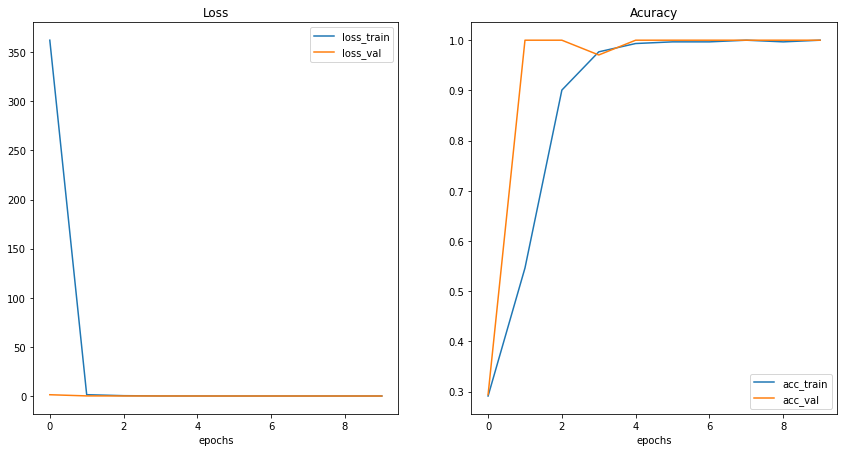

In [73]:
fig = plt.figure(figsize=(14.4,7.2))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(x,values_loss_train,label='loss_train')
ax1.plot(x,values_loss_validation,label = 'loss_val')
ax1.set_title('Loss')
ax1.set_xlabel('epochs')
ax1.legend(loc='best')

ax2 = fig.add_subplot(1,2,2)
ax2.plot(x,values_accuracy_train,label='acc_train')
ax2.plot(x,values_accuracy_validation,label = 'acc_val')
ax2.set_title('Acuracy')
ax2.set_xlabel('epochs')
ax2.legend(loc='best')




In [74]:
fig.savefig('squad imagens normal2.png')

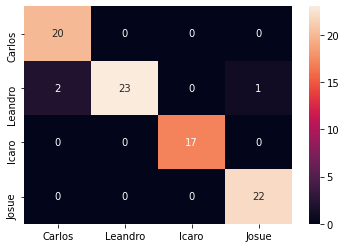

In [75]:
df = pd.DataFrame(confusion_matrix(y_test,y_pred),index=['Carlos','Leandro','Icaro','Josue'],
                  columns=['Carlos','Leandro','Icaro','Josue'])
sns.heatmap(df,annot=True)
plt.savefig('matriz de confusao imagens normais 2')

# Modelo Transfer Learning

In [32]:
vgg = keras.applications.vgg16.VGG16(include_top=False, input_shape=X_train.shape[1:], weights = 'imagenet' )

x = vgg.output
x = Flatten()(x)
x = Dense(4)(x)
out = Activation('softmax')(x)

model_tl = keras.Model(inputs=vgg.input,outputs=out)

In [33]:
model_tl.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [34]:
model_tl.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['sparse_categorical_accuracy'])

In [35]:
with tf.device('CPU'):
    history_tl = model_tl.fit(X_train, y_train,
                        epochs=epochs,
                        batch_size = batch_size,
                        validation_split=0.1)
    

Epoch 1/10
10/10 [==============================] - 122s 12s/step - loss: 59.9320 - sparse_categorical_accuracy: 0.2450 - val_loss: 1.1399 - val_sparse_categorical_accuracy: 0.5588
Epoch 2/10
10/10 [==============================] - 116s 12s/step - loss: 0.8613 - sparse_categorical_accuracy: 0.6225 - val_loss: 0.3919 - val_sparse_categorical_accuracy: 0.8235
Epoch 3/10
10/10 [==============================] - 112s 11s/step - loss: 0.2652 - sparse_categorical_accuracy: 0.8907 - val_loss: 0.0596 - val_sparse_categorical_accuracy: 0.9706
Epoch 4/10
10/10 [==============================] - 110s 11s/step - loss: 0.1662 - sparse_categorical_accuracy: 0.9702 - val_loss: 0.0364 - val_sparse_categorical_accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 110s 11s/step - loss: 0.0513 - sparse_categorical_accuracy: 0.9834 - val_loss: 2.0058e-05 - val_sparse_categorical_accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 110s 11s/step - loss: 0.1283 - sparse_categ

In [37]:
with tf.device('CPU'):
    y_pred = model_tl.predict(X_test)

In [38]:
y_pred = y_pred.argmax(1)

In [39]:
y_pred

array([0, 1, 2, 3, 3, 1, 0, 1, 3, 0, 1, 1, 2, 0, 1, 2, 1, 2, 2, 0, 1, 0,
       2, 0, 3, 3, 0, 3, 1, 3, 1, 2, 1, 1, 2, 1, 0, 3, 1, 0, 0, 2, 2, 3,
       2, 3, 1, 0, 2, 3, 2, 0, 3, 1, 0, 0, 1, 2, 0, 3, 1, 2, 1, 3, 2, 3,
       1, 0, 0, 0, 2, 3, 2, 2, 2, 1, 3, 1, 0, 1, 0, 2, 1, 0, 3])

In [40]:
y_test

array([0, 1, 2, 3, 3, 1, 0, 1, 3, 0, 1, 1, 2, 0, 1, 2, 1, 2, 2, 0, 1, 0,
       2, 0, 3, 3, 0, 3, 1, 3, 1, 2, 1, 1, 2, 1, 0, 3, 1, 0, 0, 2, 2, 3,
       2, 3, 1, 0, 2, 3, 2, 0, 3, 1, 0, 0, 1, 2, 0, 3, 1, 2, 1, 3, 2, 3,
       1, 0, 0, 0, 2, 3, 2, 2, 2, 1, 3, 1, 0, 1, 0, 2, 1, 0, 3])

In [41]:
accuracy_score(y_test,y_pred)

1.0

In [42]:
np.mean(precision_score(y_test,y_pred,average=None))

1.0

In [43]:
np.mean(recall_score(y_test,y_pred,average=None))

1.0

In [44]:
confusion_matrix(y_test,y_pred)

array([[22,  0,  0,  0],
       [ 0, 24,  0,  0],
       [ 0,  0, 21,  0],
       [ 0,  0,  0, 18]])

In [45]:
values_loss_train = history_tl.history['loss']
values_loss_validation = history_tl.history['val_loss']
values_accuracy_train = history_tl.history['sparse_categorical_accuracy']
values_accuracy_validation = history_tl.history['val_sparse_categorical_accuracy']

x = range(epochs)

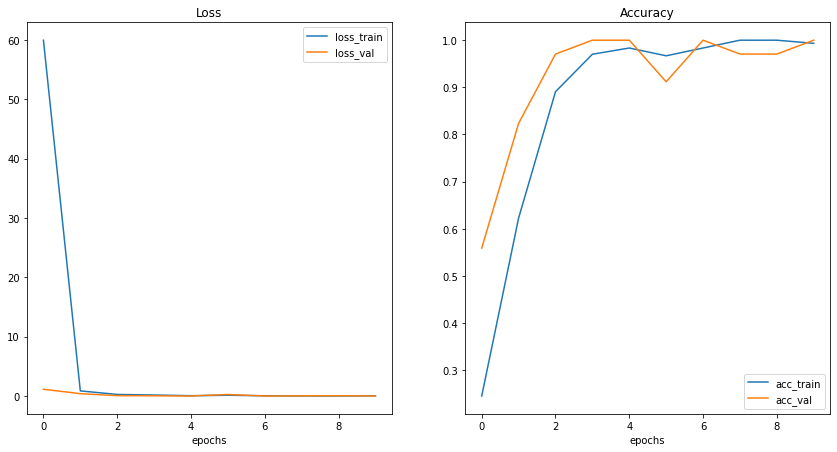

In [46]:
fig = plt.figure(figsize=(14.4,7.2))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(x,values_loss_train,label='loss_train')
ax1.plot(x,values_loss_validation,label = 'loss_val')
ax1.set_title('Loss')
ax1.set_xlabel('epochs')
ax1.legend(loc='best')

ax2 = fig.add_subplot(1,2,2)
ax2.plot(x,values_accuracy_train,label='acc_train')
ax2.plot(x,values_accuracy_validation,label = 'acc_val')
ax2.set_title('Accuracy')
ax2.set_xlabel('epochs')
ax2.legend(loc='best')



In [49]:
fig.savefig('VGG16 imagens bordas.png')

<AxesSubplot:>

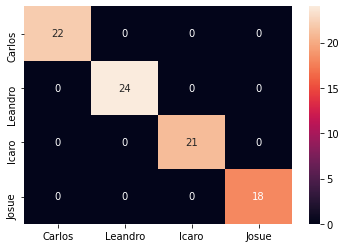

In [50]:
df = pd.DataFrame(confusion_matrix(y_test,y_pred),index=['Carlos','Leandro','Icaro','Josue'],
                  columns=['Carlos','Leandro','Icaro','Josue'])
sns.heatmap(df,annot=True)
plt.savefig(' VGG16 matriz de confusao imagens normais 2')